In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import tree 
from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [85]:
# aktobe = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\Aktobe_stac.csv')
# aktobe_ammi = aktobe.loc[aktobe.Name_primesy == 'Формальдегид']

# # aktobe_ammi.describe()
# aktobe
# #aktobe_ammi.plot.scatter(x='contz', y='date')
# #plt.show()
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline
temirtau05 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\темиртау3-05.csv')
temirtau06 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\Лист-Microsoft-Excel.csv')
temirtau07 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\3-7.csv')
temirtau5 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\темиртау4-5_1.csv')
temirtau6 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\4-6.csv')
temirtau7 = pd.read_csv(r'C:\Users\renat\OneDrive\Рабочий стол\6 семестр\Smart-сенсорные системы\stud\4-7.csv')
temirtau05_train = temirtau05.loc[temirtau05.Name_primesy == 'Азота диоксид']
temirtau06_train = temirtau06.loc[temirtau06.Name_primesy == 'Азота диоксид']
temirtau07_train = temirtau07.loc[temirtau07.Name_primesy == 'Азота диоксид']
temirtau05_test = temirtau5.loc[temirtau05.Name_primesy == 'Азота диоксид']
temirtau06_test = temirtau6.loc[temirtau06.Name_primesy == 'Азота диоксид']
temirtau07_test = temirtau7.loc[temirtau07.Name_primesy == 'Азота диоксид']
# tem = temirtau.goupby(['Name_primesy']).mean
# temirtau05
# temirtau06
# temirtau05
# temirtau_subs.contz.hist()
# temirtau_subs.plot.scatter(x='contz', y='Temp_grad')
#plt.show()
# temirtau_subs.contz.max
# temirtau06.drop(temirtau06.index[[700]])
# temirtau07

In [86]:
clf = tree.DecisionTreeClassifier()

In [87]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
dat1 = pd.DataFrame({'X1': temirtau05_train.contz, 'X2': temirtau06_train.contz, 'Y': temirtau07_train.contz})
# # dat2 = pd.DataFrame({})
# # X.join(dat2)
# # dat2 = pd.DataFrame({'y': temirtau07_subs.contz})
# dat1

dat2 = pd.DataFrame({'X1': temirtau05_test.contz, 'X2': temirtau06_test.contz, 'Y': temirtau07_test.contz})

In [106]:
X = dat1[['X1', 'X2']]
Y = dat1.Y

Z = dat2[['X1', 'X2']]
C = dat2.Y

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=6)

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy().reshape(-1, 1)

In [111]:
print("Train shapes:", X_train.shape, Y_train.shape)
print("Test shapes: ", X_test.shape, Y_test.shape)

Train shapes: (57, 2) (57, 1)
Test shapes:  (15, 2) (15, 1)


In [112]:
class CustomLinearRegression():
    def __init__(self, alpha=0.001, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter
        self.weights = None

    def load_weights(self, file_name='linear_regression.weights'):
        try:
            with open(file_name, 'rb') as file:
                self.weights = np.load(file)['weights']
        except FileNotFoundError:
            print('Weights not found. Initialized with zeros')
        except ValueError:
            print('Inappropriate is was provided.')
        except Exception as e:
            print('Error occured while loading weights', e)
    
    def save_weights(self, file_name='linear_regression.weights'):
        try:
            with open(file_name, 'wb') as file:
                np.savez(file, weights=lr.weights)
        except Exception as e:
            print('Error occured while saving weights', e)
    
    def fit(self, X, y, X_test=None, y_test=None, return_costs=False):
        """
        returns (train_costs, test_costs) if return_costs is True
        """
        self.X =  np.hstack((np.ones((X.shape[0], 1)), X)) # добавление вектора единиц для обучения сдвига
        self.y = y.reshape(-1, 1) # преобразование вектора-строки в вектор-столбец
        self.n_samples = X.shape[0]
        
        if self.weights is None:
            self.weights = np.zeros((self.X.shape[1], 1)) # если веса не были загружены, инициализируем их нулями
        
        if return_costs:
            train_costs = [] # для построения графиков
            test_costs = [] # для построения графиков
        
        for i in range(self.n_iter):
            preds = self.X @ self.weights
            diff = preds - self.y
            grad = self.X.T @ diff # вычисление градиента
            self.weights -= (self.alpha/self.n_samples) * grad # корректировна значений весов по направлению антиградиента
            
            if return_costs:
                train_costs.append(np.sqrt(mean_squared_error(y, self.predict(X))))
                test_costs.append(np.sqrt(mean_squared_error(y_test, self.predict(X_test))))
        
        if return_costs:
            return (train_costs, test_costs)
                
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.weights        

In [113]:
lr = CustomLinearRegression(alpha=0.001, n_iter=1000)
lr.load_weights()
# lr.fit(X_train, Y_train)

In [114]:
# model evaluation for training set

y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lr.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.6950039422507515
R2 score is -3575.4950517058687


The model performance for testing set
--------------------------------------
RMSE is 0.7183436923864018
R2 score is -4205.665709711925


In [115]:
learning_rates = [0.001, 0.002, 0.003]
colors = ['blue', 'red', 'purple']

train_accuracies = [] 
train_costs = []

test_accuracies = []
test_costs = []

In [116]:
for learning_rate in tqdm(learning_rates):
    lr = CustomLinearRegression(alpha=learning_rate, n_iter=1000)
    train_cost, test_cost = lr.fit(X_train, Y_train, X_test, Y_test, return_costs=True)
    
    train_costs.append(train_cost)
    test_costs.append(test_cost)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]


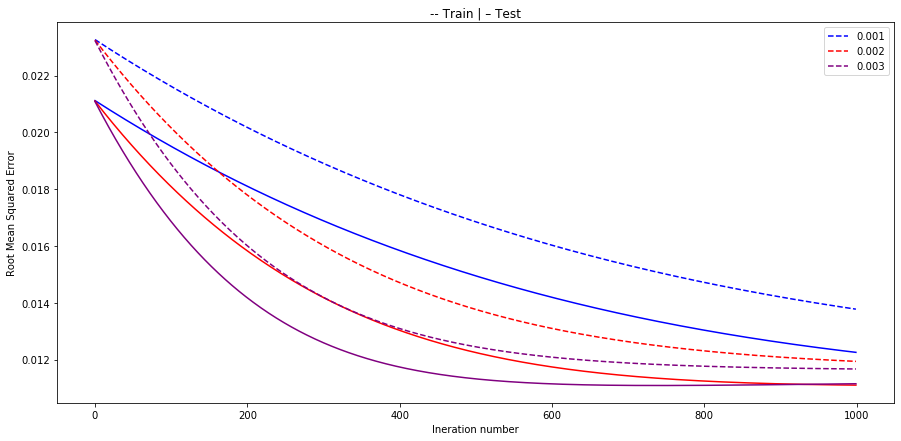

In [117]:
plt.figure(figsize=(15, 7))

plt.title('-- Train | – Test')
plt.xlabel('Ineration number')
plt.ylabel('Root Mean Squared Error')
for i in range(len(learning_rates)):
    plt.plot(train_costs[i], linestyle='--', label=str(learning_rates[i]), c=colors[i])
    plt.plot(test_costs[i], c=colors[i])
    plt.legend()

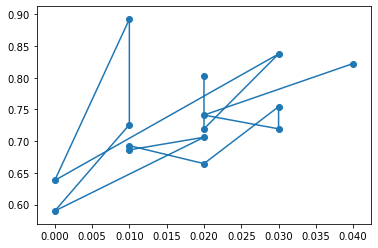

In [131]:
plt.plot(Y_test, y_test_predict)
m = plt.scatter(Y_test, y_test_predict )

# plt.xticks(())
# plt.yticks(())
plt.show()

# идеально

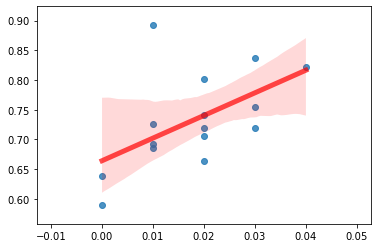

In [133]:
sns.regplot(Y_test, y_test_predict, line_kws={"color":"r","alpha":0.7,"lw":5})
